### Notebook to generate the figure showing the LKmeans 2D centres


In [1]:
using CSV
using DataFrames
using CairoMakie
using MultivariateStats
using Statistics

In [2]:
centers = CSV.read("../../Data/cluster_centers_02.csv", DataFrame)
cluster_assignments = CSV.read("../../Data/cluster_assignments_02.csv", DataFrame)
data = CSV.read("../../Data/cluster_data_02.csv", DataFrame);


data_matrix_k5 = reshape(data[:, 1], 5, 100);
data_matrix_k6 = reshape(data[:, 2], 5, 100);
data_matrix = vcat(data_matrix_k5, data_matrix_k6);
data_matrix_normalized = (data_matrix .- mean(data_matrix, dims=2)) ./ std(data_matrix, dims=2);
centers_normalized = Matrix((centers .- mean(data_matrix, dims=2)) ./ std(data_matrix, dims=2))

10×4 Matrix{Float64}:
 -0.0121812  -0.0121812   0.0121812   0.0121812
 -0.805959   -0.805959    0.805959    0.805959
 -0.935      -0.935       0.935       0.935
 -0.966919   -0.966919    0.966919    0.966919
 -0.974445   -0.974445    0.974445    0.974445
 -0.208077    0.208077   -0.208077    0.208077
  0.901036   -0.901036    0.901036   -0.901036
  0.878524   -0.878524    0.878524   -0.878524
  0.365911   -0.365911    0.365911   -0.365911
 -0.959232    0.959232   -0.959232    0.959232

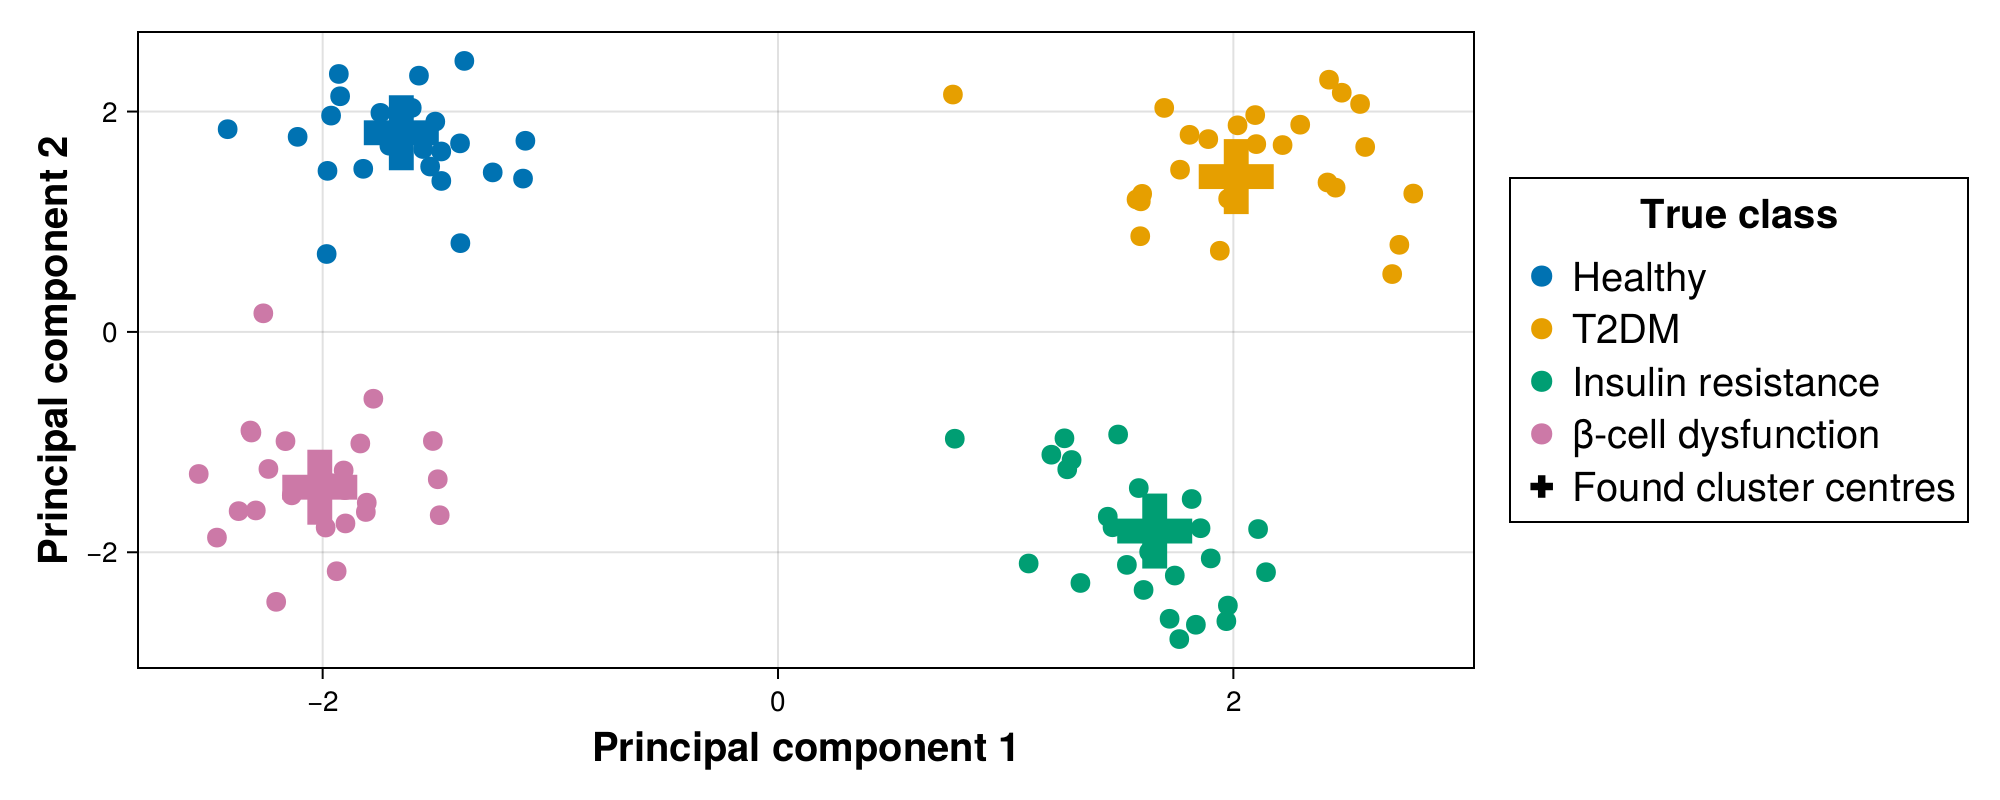

CairoMakie.Screen{IMAGE}


In [4]:
# Perform PCA on the data matrix
pca_model = fit(PCA, data_matrix_normalized; maxoutdim=2)

# Transform the data matrix using the PCA model
pca_transformed = MultivariateStats.transform(pca_model, data_matrix_normalized)
centers_transformed = MultivariateStats.transform(pca_model, centers_normalized)

# Extract the first two principal components
pc1 = pca_transformed[1, :]
pc2 = pca_transformed[2, :]

# Define dummy cluster assignments if available, otherwise assign all to one cluster
cluster_labels = cluster_assignments[:, 1] 
unique_clusters = [1,2,3,4]

# Define colormap using Makie.wong_colors()
wong_colors = Makie.wong_colors()[1:length(unique_clusters)]
wong_colors_centres = [wong_colors[3], wong_colors[2], wong_colors[4], wong_colors[1]]

# Create the figure
fig = Figure(size = (1000, 400))

# Axis for the scatter plot
ax = Axis(fig[1, 1], xlabel = "Principal component 1", ylabel = "Principal component 2",
          xlabelsize = 20, ylabelsize = 20, xticklabelsize = 14, yticklabelsize = 14, 
          xlabelfont = :bold, ylabelfont = :bold)

# Scatter plot of PCA points coloured by cluster labels
scatter!(ax, pc1, pc2, color=cluster_labels, colormap=wong_colors, markersize = 14)

# Optional: Overlay cluster centres if available (replace center_pc1 and center_pc2 accordingly)
center_pc1 = centers_transformed[1, :]
center_pc2 = centers_transformed[2, :]
scatter!(ax, center_pc1, center_pc2, markersize=50, color = wong_colors_centres, marker=:cross)

# Legend for clusters
dot_legend = [MarkerElement(color = wong_colors[i], marker = :circle, markersize = 15) for i in 1:length(unique_clusters)]
legend_labels = vcat(["Healthy", "T2DM", "Insulin resistance", "β-cell dysfunction"])
push!(dot_legend, MarkerElement(color = :black, marker = :cross, markersize = 15))
push!(legend_labels, "Found cluster centres")

# Add the legend
Legend(fig[1, 2], dot_legend, legend_labels, "True class", titlesize = 20, titlefont = :bold, labelsize = 20,  titleposition = :top)

# Display the figure
display(fig)

# Optionally save the plot
save("./PCA_plot_lkmeans.png", fig)


In [6]:
dot_legend

5-element Vector{MarkerElement}:
 MarkerElement(Attributes with 3 entries:
  marker => circle
  markercolor => RGBA{Float32}(0.0,0.447059,0.698039,1.0)
  markersize => 15)
 MarkerElement(Attributes with 3 entries:
  marker => circle
  markercolor => RGBA{Float32}(0.901961,0.623529,0.0,1.0)
  markersize => 15)
 MarkerElement(Attributes with 3 entries:
  marker => circle
  markercolor => RGBA{Float32}(0.0,0.619608,0.45098,1.0)
  markersize => 15)
 MarkerElement(Attributes with 3 entries:
  marker => circle
  markercolor => RGBA{Float32}(0.8,0.47451,0.654902,1.0)
  markersize => 15)
 MarkerElement(Attributes with 3 entries:
  marker => cross
  markercolor => black
  markersize => 15)

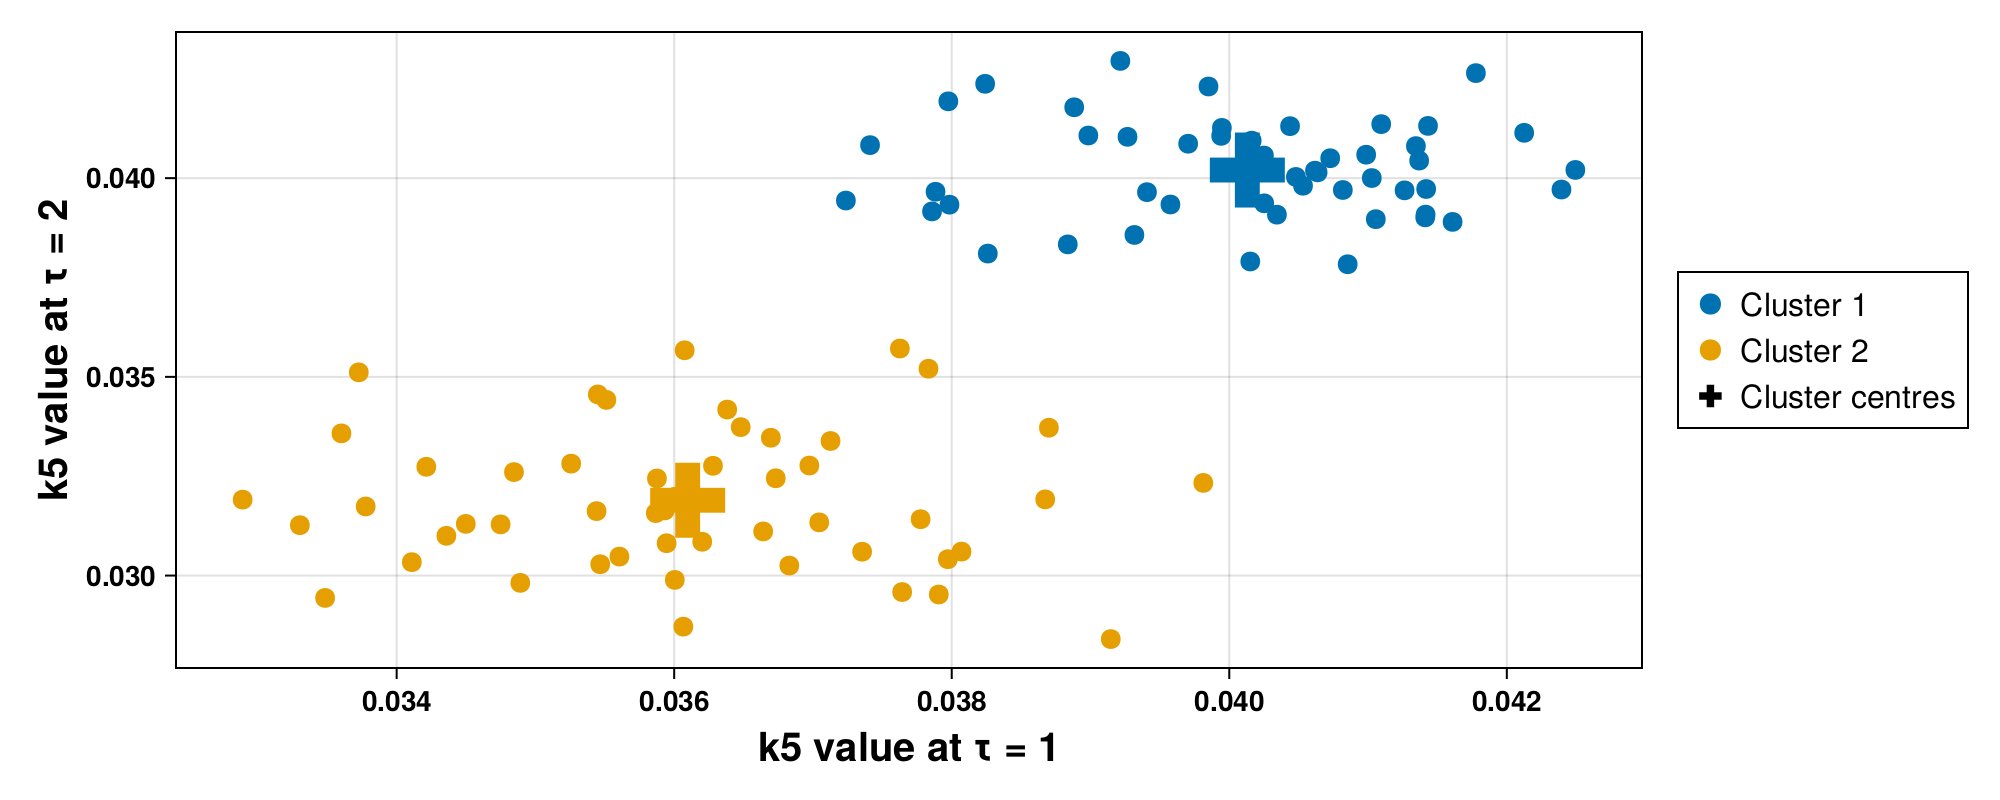

CairoMakie.Screen{IMAGE}


In [12]:
using CairoMakie

# Extract the first two variables (rows) from centers and data
data_x = Float64.(vec(data_matrix[2, :]))  # First variable (for x-axis)
data_y = Float64.(vec(data_matrix[3, :]))  # Second variable (for y-axis)

# Cluster assignments
cluster_labels = cluster_assignments[:, 1]
cluster_centres_labels = [1,2]

# Use Makie.wong_colors() for colormap
wong_colors = Makie.wong_colors()[1:2]

# Create the figure with the specified size
fig = Figure(size = (1000, 400))  # Adjusted width to accommodate the legend

# First subplot (axis) for the scatter plot
ax = Axis(fig[1, 1], xlabel = "k5 value at τ = 1", ylabel = "k5 value at τ = 2",
          xlabelsize = 20, ylabelsize = 20, xticklabelsize = 14, yticklabelsize = 14, 
          xlabelfont = :bold, ylabelfont = :bold, xticklabelfont = :bold, yticklabelfont = :bold)

# Scatter plot of all individuals coloured by cluster assignments
scatter!(ax, data_x, data_y, color=cluster_labels, colormap=wong_colors, markersize = 14)

# Overlay cluster centers (first two variables from the centers DataFrame)
center_x = collect(centers[2, :])  # First variable of the centers
center_y = collect(centers[3, :])  # Second variable of the centers

# Ensure that the centers are treated as individual points
scatter!(ax, center_x, center_y, markersize=50, color = cluster_centres_labels, colormap=wong_colors, marker=:cross)

# Create the legend dynamically for the dots (clusters) and crosses (cluster centres)
dot_legend = [MarkerElement(color = wong_colors[i], marker = :circle, markersize = 15) for i in 1:2]
cross_legend = MarkerElement(color = :black, marker = :cross, markersize = 15)

# Combine the legend entries and labels
legend_entries = vcat(dot_legend, cross_legend)
legend_labels = vcat(["Cluster $i" for i in 1:2], ["Cluster centres"])

# Add the legend
Legend(fig[1, 2], legend_entries, legend_labels, labelsize = 16)

# Show the plot
display(fig)

# save the plot
# save("./LKmeans_example_fit.png", fig)


In [10]:
data_x

5-element Vector{Float64}:
 0.04195853087590314
 0.03664123432095049
 0.03111065418439348
 0.028796560765166783
 0.025122169442501896